In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df = pd.read_csv('CarPrice_Assignment.csv')
df=df.drop(['CarName', 'car_ID'], axis=1)
df = df.sample(frac=1, random_state=200).reset_index(drop=True)
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.50,123,4350,22,25,28176.0
1,3,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
2,2,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.00,100,5500,26,32,9995.0
3,0,diesel,turbo,four,sedan,fwd,front,100.4,180.2,66.9,...,97,idi,3.01,3.40,23.00,68,4500,33,38,13845.0
4,-1,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,...,110,idi,3.27,3.35,22.50,73,4500,30,33,10698.0


In [67]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [68]:
df.select_dtypes(include=['object'])

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,diesel,turbo,two,hardtop,rwd,front,ohc,five,idi
1,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,diesel,turbo,four,sedan,fwd,front,ohc,four,idi
4,diesel,turbo,four,sedan,fwd,front,ohc,four,idi
...,...,...,...,...,...,...,...,...,...
200,gas,std,two,sedan,fwd,front,ohc,four,2bbl
201,diesel,turbo,four,wagon,rwd,front,ohc,five,idi
202,gas,std,two,sedan,rwd,front,ohc,six,mpfi
203,gas,turbo,two,hatchback,rwd,front,ohcv,six,mpfi


In [69]:
# encoding the object columns using label encoding

categorical_features = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
                        'cylindernumber','fuelsystem']
encoder= LabelEncoder()
df[categorical_features] = df[categorical_features].apply(encoder.fit_transform)
df[categorical_features]


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,0,1,1,1,2,0,3,1,3
1,1,0,1,2,1,0,3,2,5
2,1,0,0,3,1,0,3,2,5
3,0,1,0,3,1,0,3,2,3
4,0,1,0,3,1,0,3,2,3
...,...,...,...,...,...,...,...,...,...
200,1,0,1,3,1,0,3,2,1
201,0,1,0,4,2,0,3,1,3
202,1,0,1,3,2,0,3,3,5
203,1,1,1,2,2,0,5,3,5


In [70]:
# Normalization using MinMaxScaler
features=df.columns
xx = df[features].values
Scaler = MinMaxScaler()
x_scaled = Scaler.fit_transform(xx)
df_temp = pd.DataFrame(x_scaled, columns=features, index = df.index)
df[features] = df_temp
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.4,0.0,1.0,1.0,0.25,1.0,0.0,0.586006,0.692537,0.833333,...,0.460377,0.428571,0.742857,0.747619,0.906250,0.312500,0.081633,0.250000,0.236842,0.572414
1,1.0,1.0,0.0,1.0,0.50,0.5,0.0,0.364431,0.679104,0.516667,...,0.226415,0.714286,0.714286,0.476190,0.144375,0.258333,0.448980,0.222222,0.315789,0.167122
2,0.8,1.0,0.0,0.0,0.75,0.5,0.0,0.311953,0.456716,0.433333,...,0.181132,0.714286,0.464286,0.633333,0.187500,0.216667,0.551020,0.361111,0.421053,0.121071
3,0.4,0.0,1.0,0.0,0.75,0.5,0.0,0.402332,0.583582,0.550000,...,0.135849,0.428571,0.335714,0.633333,1.000000,0.083333,0.142857,0.555556,0.578947,0.216648
4,0.2,0.0,1.0,0.0,0.75,0.5,0.0,0.460641,0.514925,0.516667,...,0.184906,0.428571,0.521429,0.609524,0.968750,0.104167,0.142857,0.472222,0.447368,0.138523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.6,1.0,0.0,1.0,0.75,0.5,0.0,0.288630,0.417910,0.475000,...,0.184906,0.142857,0.435714,0.719048,0.131250,0.216667,0.551020,0.333333,0.394737,0.129760
201,0.2,0.0,1.0,0.0,1.00,1.0,0.0,0.682216,0.743284,0.833333,...,0.460377,0.428571,0.742857,0.747619,0.906250,0.312500,0.081633,0.250000,0.236842,0.574202
202,0.4,1.0,0.0,1.0,0.75,1.0,0.0,0.492711,0.786567,0.633333,...,0.558491,0.714286,0.771429,0.628571,0.062500,0.558333,0.510204,0.083333,0.157895,0.898590
203,1.0,1.0,1.0,1.0,0.50,1.0,0.0,0.137026,0.441791,0.633333,...,0.452830,0.714286,0.635714,0.571429,0.050000,0.633333,0.428571,0.111111,0.184211,0.361973


In [71]:
# splitting to train, test and validation datasets

data = np.array(df)

train_point = 110
valid_point= train_point + 40
test_point= data.shape[0]-valid_point

train_data = data[0:train_point,:]
valid_data = data[train_point:valid_point,:]
test_data = data[valid_point:,:]


train_x = train_data[:,0:-1]
train_y = train_data[:,-1]
valid_x = valid_data[:,0:-1]
valid_y = valid_data[:,-1]
test_x = test_data[:,0:-1]
test_y = test_data[:,-1]


train_x.shape

(110, 23)

In [102]:

model=Sequential()
model.add(Dense(10,input_dim=23,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6,activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(64,activation='relu', kernel_regularizer=('l2')))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='rmsprop',metrics=['mae'], loss='mse')
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                240       
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_15 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_59 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 7         
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [103]:
history=model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=30,epochs=200,verbose=2)

Train on 110 samples, validate on 40 samples
Epoch 1/200
 - 1s - loss: 0.0564 - mae: 0.1695 - val_loss: 0.0261 - val_mae: 0.1218
Epoch 2/200
 - 0s - loss: 0.0420 - mae: 0.1495 - val_loss: 0.0241 - val_mae: 0.1158
Epoch 3/200
 - 0s - loss: 0.0490 - mae: 0.1557 - val_loss: 0.0239 - val_mae: 0.1118
Epoch 4/200
 - 0s - loss: 0.0325 - mae: 0.1308 - val_loss: 0.0242 - val_mae: 0.1130
Epoch 5/200
 - 0s - loss: 0.0528 - mae: 0.1521 - val_loss: 0.0226 - val_mae: 0.1084
Epoch 6/200
 - 0s - loss: 0.0609 - mae: 0.1650 - val_loss: 0.0232 - val_mae: 0.1079
Epoch 7/200
 - 0s - loss: 0.0461 - mae: 0.1413 - val_loss: 0.0216 - val_mae: 0.1049
Epoch 8/200
 - 0s - loss: 0.0372 - mae: 0.1402 - val_loss: 0.0209 - val_mae: 0.1025
Epoch 9/200
 - 0s - loss: 0.0406 - mae: 0.1302 - val_loss: 0.0212 - val_mae: 0.1014
Epoch 10/200
 - 0s - loss: 0.0322 - mae: 0.1272 - val_loss: 0.0214 - val_mae: 0.1031
Epoch 11/200
 - 0s - loss: 0.0365 - mae: 0.1282 - val_loss: 0.0200 - val_mae: 0.1016
Epoch 12/200
 - 0s - loss: 0.

Epoch 97/200
 - 0s - loss: 0.0122 - mae: 0.0678 - val_loss: 0.0069 - val_mae: 0.0652
Epoch 98/200
 - 0s - loss: 0.0100 - mae: 0.0667 - val_loss: 0.0080 - val_mae: 0.0712
Epoch 99/200
 - 0s - loss: 0.0093 - mae: 0.0676 - val_loss: 0.0077 - val_mae: 0.0700
Epoch 100/200
 - 0s - loss: 0.0092 - mae: 0.0661 - val_loss: 0.0072 - val_mae: 0.0665
Epoch 101/200
 - 0s - loss: 0.0077 - mae: 0.0652 - val_loss: 0.0076 - val_mae: 0.0664
Epoch 102/200
 - 0s - loss: 0.0086 - mae: 0.0631 - val_loss: 0.0075 - val_mae: 0.0641
Epoch 103/200
 - 0s - loss: 0.0096 - mae: 0.0666 - val_loss: 0.0071 - val_mae: 0.0632
Epoch 104/200
 - 0s - loss: 0.0111 - mae: 0.0671 - val_loss: 0.0068 - val_mae: 0.0650
Epoch 105/200
 - 0s - loss: 0.0079 - mae: 0.0666 - val_loss: 0.0072 - val_mae: 0.0667
Epoch 106/200
 - 0s - loss: 0.0086 - mae: 0.0675 - val_loss: 0.0069 - val_mae: 0.0662
Epoch 107/200
 - 0s - loss: 0.0072 - mae: 0.0607 - val_loss: 0.0066 - val_mae: 0.0643
Epoch 108/200
 - 0s - loss: 0.0100 - mae: 0.0729 - val_lo

Epoch 193/200
 - 0s - loss: 0.0114 - mae: 0.0681 - val_loss: 0.0062 - val_mae: 0.0601
Epoch 194/200
 - 0s - loss: 0.0068 - mae: 0.0627 - val_loss: 0.0055 - val_mae: 0.0574
Epoch 195/200
 - 0s - loss: 0.0051 - mae: 0.0522 - val_loss: 0.0063 - val_mae: 0.0591
Epoch 196/200
 - 0s - loss: 0.0105 - mae: 0.0660 - val_loss: 0.0060 - val_mae: 0.0588
Epoch 197/200
 - 0s - loss: 0.0106 - mae: 0.0650 - val_loss: 0.0052 - val_mae: 0.0563
Epoch 198/200
 - 0s - loss: 0.0069 - mae: 0.0558 - val_loss: 0.0058 - val_mae: 0.0574
Epoch 199/200
 - 0s - loss: 0.0075 - mae: 0.0588 - val_loss: 0.0062 - val_mae: 0.0601
Epoch 200/200
 - 0s - loss: 0.0093 - mae: 0.0629 - val_loss: 0.0056 - val_mae: 0.0599


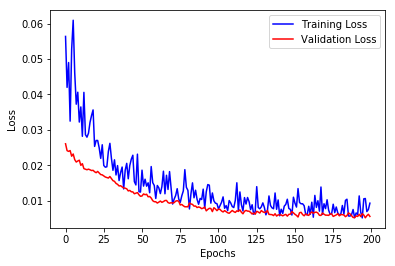

In [104]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.legend(loc="upper right")
# plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'],'r')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [105]:
# Evaluating the model
scores = model.evaluate(test_x, test_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

mae: 7.02%
